# ULMFiT: Train spanish LM

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.text import *

In [32]:
PATH = Path('~/datasets/wikimedia').expanduser()

## Raw data

In [ ]:
wiki_file = 'wiki.es.txt'

In [38]:
row_list = []
with open(PATH/wiki_file, 'r') as f:
    for i, line in enumerate(f):
        if len(line.split()) > 150: # dismiss lines with less than 150 words
            row_list.append(line)
df = pd.DataFrame(row_list, columns=['text'])

In [42]:
df.head()

,text
0,el usuario ha decidido pedir el bloqueo indef...
1,en regresó a las tablas con openheart el trián...
2,"tradicionalmente , hampstead , como otros muni..."
3,aniplex comenzó la distribución de mercancía o...
4,"por fin , en , el perú y ecuador , mediante el..."


In [54]:
# number of tokens
sum(df.text.str.split().apply(lambda x: len(x)))

131465995

In [56]:
val_sz = int(0.1 * len(df))
shuffled = np.random.permutation(len(df))
trn_df = df.iloc[shuffled][val_sz:]
val_df = df.iloc[shuffled][:val_sz]

In [64]:
trn_df.to_csv(PATH/'train.csv', index=None)
trn_df.to_csv(PATH/'valid.csv', index=None)

## Load data

In [68]:
trn_df = pd.read_csv(PATH/'train.csv')
trn_df = pd.read_csv(PATH/'valid.csv')

In [5]:
data_lm = TextLMDataBunch.from_df(PATH, trn_df, val_df, text_cols='text', 
                                  tokenizer=Tokenizer(lang='es'), bs=48)

In [55]:
pickle.dump(data_lm.train_ds.vocab.itos, open('itos.pkl', 'wb'))

## Model

In [28]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


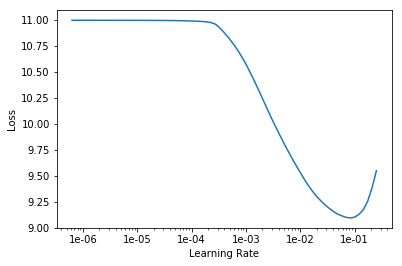

In [10]:
learn.recorder.plot(skip_end=12)

In [11]:
learn.fit_one_cycle(1, 2e-3, moms=(0.8, 0.7))

Total time: 1:46:30
epoch  train_loss  valid_loss  accuracy
1      4.168079    4.087315    0.286290  (1:46:30)



In [13]:
learn.save('weights-1')

In [30]:
learn.fit_one_cycle(4, 2e-3, moms=(0.8, 0.7))

Total time: 7:06:30
epoch  train_loss  valid_loss  accuracy
1      4.175116    4.097802    0.281919  (1:46:26)
2      4.071382    4.027313    0.287236  (1:46:50)
3      3.975520    3.912925    0.299030  (1:46:36)
4      3.921592    3.863933    0.305236  (1:46:37)



In [31]:
learn.save('weights-5')

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


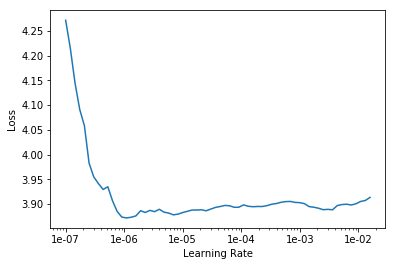

In [37]:
learn.recorder.plot(0,30)

In [38]:
learn.fit_one_cycle(1, 1e-6, moms=(0.8, 0.7))

Total time: 1:46:36
epoch  train_loss  valid_loss  accuracy
1      3.898500    3.861971    0.305301  (1:46:36)



In [39]:
learn.save('weights-6')